# Levich Equation Analysis

We seek to calculate the diffusion coefficient from the RDE data that we have obtained. The Levich equation is given by:

## $I_L = 0.620 * n * F * A * D^{2/3} * \nu ^{-1/6} * C * \omega ^{1/2} $

Where:

* $I_L$ - Limiting current (Amps)
* $n$ - number of electrons per redox reaction
* $F$ - Faraday's Constant ($C/mol$)
* $A$ - Electrode Area ($cm^2$)
* $D$ - Diffusion coefficient ($cm^2/s$)
* $\nu$ - Kinematic viscosity of water ($cm^2/s$)
* $C$ - Concentration of the redox active species ($mol/cm^3$)
* $\omega$ - Angular velocity ($Rad/s$)

The electrochemical reaction is:

## $Fe(CN) _{6} ^{4-} \Rightarrow Fe(CN) _{6} ^{3-} + e^{-}$


In [1]:
# Import libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd


# Load Data Files and Plot Current vs. Potential

In [2]:
RDE_0200RPM = pd.read_csv("RDE_0200RPM.txt", sep="\t")
RDE_0344RPM = pd.read_csv("RDE_0344RPM.txt", sep="\t")
RDE_0489RPM = pd.read_csv("RDE_0489RPM.txt", sep="\t")
RDE_0633RPM = pd.read_csv("RDE_0633RPM.txt", sep="\t")
RDE_0778RPM = pd.read_csv("RDE_0778RPM.txt", sep="\t")
RDE_0922RPM = pd.read_csv("RDE_0922RPM.txt", sep="\t")
RDE_1067RPM = pd.read_csv("RDE_1067RPM.txt", sep="\t")
RDE_1211RPM = pd.read_csv("RDE_1211RPM.txt", sep="\t")
RDE_1355RPM = pd.read_csv("RDE_1355RPM.txt", sep="\t")
RDE_1500RPM = pd.read_csv("RDE_1500RPM.txt", sep="\t")

RDE_0200RPM.head()

,Point,Potential(V),Current(milliAmp)
0,1,-0.000037,-0.281996
1,2,0.004100,-0.277313
2,3,0.009174,-0.273659
3,4,0.014170,-0.270630
4,5,0.019166,-0.267820


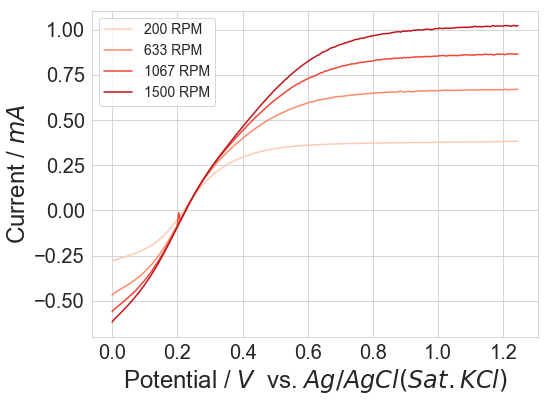

In [3]:
sns.set_style('whitegrid')
fig1 = plt.figure()
fig1.set_size_inches(8, 6)
ax1 = fig1.add_subplot(111)
colors = sns.color_palette("Reds", 4)
ax1.plot(RDE_0200RPM["Potential(V)"], RDE_0200RPM["Current(milliAmp)"], color=colors[0], label="200 RPM")
ax1.plot(RDE_0633RPM["Potential(V)"], RDE_0633RPM["Current(milliAmp)"], color=colors[1], label="633 RPM")
ax1.plot(RDE_1067RPM["Potential(V)"], RDE_1067RPM["Current(milliAmp)"], color=colors[2], label="1067 RPM")
ax1.plot(RDE_1500RPM["Potential(V)"], RDE_1500RPM["Current(milliAmp)"], color=colors[3], label="1500 RPM")

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_ylabel("Current / $mA$", fontsize=24)
ax1.set_xlabel("Potential / $V$  vs. $Ag/AgCl (Sat. KCl)$", fontsize=24)
ax1.legend(frameon=True, fontsize=14)
plt.show()
plt.close(fig1)

In [4]:
# Get the maximum current as limiting current

df_rde_analysis = pd.DataFrame()

df_rde_analysis["RPM"] = [200, 344, 489, 633, 778, 922, 1067, 1211, 1355, 1500]

df_rde_analysis["MaxCurrent"] = [max(array["Current(milliAmp)"]) for array in (RDE_0200RPM,
                                                          RDE_0344RPM,
                                                          RDE_0489RPM,
                                                          RDE_0633RPM,
                                                          RDE_0778RPM,
                                                          RDE_0922RPM,
                                                          RDE_1067RPM,
                                                          RDE_1211RPM,
                                                          RDE_1355RPM,
                                                          RDE_1500RPM,

)]

df_rde_analysis.head()

,RPM,MaxCurrent
0,200,0.382105
1,344,0.498638
2,489,0.592221
3,633,0.670035
4,778,0.742571


# Convert RPM to Angular Velocity

### $RPM = \frac{2 * \pi * radians}{minute}$

## $ \omega = \frac{ RPM * 2 * \pi}{ 60 \frac{seconds}{minute}}$

In [5]:
df_rde_analysis["omega"] = df_rde_analysis["RPM"]*(2*np.pi)/60 

In [6]:
# Convert current to A/cm^2

electrode_diameter = 0.5 #cm
electrode_area = np.pi * (electrode_diameter/2)**2 # Area = Pi*r^2

df_rde_analysis["NormalizedCurrent"] = df_rde_analysis["MaxCurrent"] / 1000 / electrode_area # Convert from milliamps to Amps and divide by area


# Perform a linear fit of the current density vs. $\omega ^{1/2}$

From the Levich Equation

### $I_L = 0.620 * n * F * A * D^{2/3}  \nu ^{-1/6} * C * \omega ^{1/2} $

### The slope of ${I_L}/A$ vs $\omega^{1/2}$ is $0.620 * n * F * A * D^{2/3} * \nu ^{-1/6} * C$.


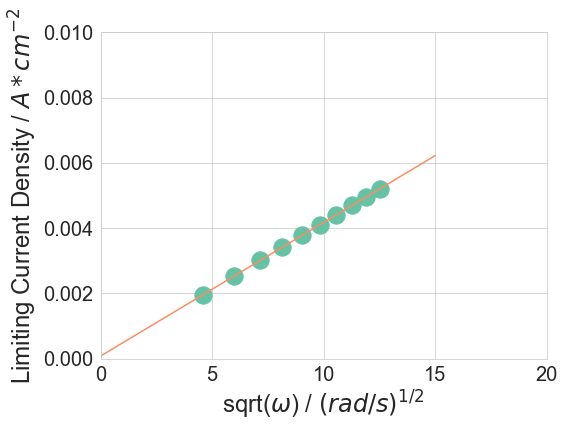

In [7]:

df_rde_analysis["SQRT omega"] = np.sqrt(df_rde_analysis["omega"])
slope, intercept, r_value, _, _ = stats.linregress(df_rde_analysis["SQRT omega"], df_rde_analysis["NormalizedCurrent"])
x_values = np.linspace(0,15)
line = slope*x_values + intercept

sns.set_style('whitegrid')
fig1 = plt.figure()
fig1.set_size_inches(8, 6)
ax1 = fig1.add_subplot(111)
colors = sns.color_palette("Set2", 4)

ax1.scatter(df_rde_analysis["SQRT omega"], df_rde_analysis["NormalizedCurrent"], s=300, color=colors[0])
ax1.plot(x_values, line, color=colors[1], label="")

ax1.set_ylim([0, 0.01])
ax1.set_xlim([0, 20.0])
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xlabel("sqrt($\omega$) / $(rad/s)^{1/2}$", fontsize=24)
ax1.set_ylabel("Limiting Current Density / $A*cm^{-2}$", fontsize=24)

plt.show()


In [8]:
# Print out the slope and R2 value
slope, r_value**2

(0.00041001972932945362, 0.99996067329482952)

# Solve for Diffusion Coefficient

* Let $S$ be the slope of the ${I_L}/A$ vs $\omega^{1/2}$ fit.

## $ S = 0.620 * n * F * A * D^{2/3}  \nu ^{-1/6} * C$

## $ D = (\frac{S}{0.620 * n * F * A * \nu ^{-1/6} * C})^{3/2}$


* $n$ - number of electrons per redox reaction - (1)
* $F$ - Faraday's Constant (96485 C/mol)
* $D$ - Diffusion coefficient - (Unknown)
* $\nu$ - Kinematic viscosity of water ($8.917 x 10^{-7} m^2 / s$) [1]
* $C$ - Concentration of the species of interest (10 mM)

[1] https://www.engineeringtoolbox.com/water-dynamic-kinematic-viscosity-d_596.html?vA=25&units=C#


In [9]:
# Convert kimeatic viscosity from m^2/s to cm^2/s by multiplying by (100 cm/m)^2
nu_cm2s = 8.917e-7 * 100 * 100

In [10]:
# Faraday's Constant
faraday_constant  = 96485 # C/mol

# number of electrons = 1
n = 1


In [11]:
# Convert Concentration to mol/cm^3

concentration_molar = 0.01 # mol / L

# Convert from molar to mol/cm^3
# C (mol / L) * ( 1 L / 1000 mL) * ( 1 mL / 1 cm^3)

concentration_molcm3 = concentration_molar / (1000)


In [12]:
# Calculate diffusion coefficient

diffusion_coeff = (slope / (0.620 * n * faraday_constant * nu_cm2s**(-1/6) * concentration_molcm3))**(1.5)
diffusion_coeff


5.5142263288017373e-06

# Result

### The diffusion coefficient we calculated is $5.51 x 10^{-6} cm^2 / s$. The literature value from [1] is $7.26 x 10^{-6} cm^2 / s$. 


* [1] S. J. Konopka and B. McDuffie, Analytical Chemistry, 42, 1741–1746 (1970). 
